# Monte Carlo Simulation is FUN!

## A friendly introduction without boring maths

The motivation behind this series of iPython notebooks is simple:

Statistics are generally taught (very) badly, especially the *really* important concepts.

I witnessed countless brilliant brains put to sleep in the typical Statistics training. (Mind you, these people are highly skilled engineers with brains that designed the most high end products in an insanely competitive market)

Words like 'Monte Carlo Simulations' became insanely sexy and hyped up. Actually they are real simple concepts.

My job here is to make Monte Carlo simulations unsexy and uncool. It should just become one of the tools in scientists and engineers arsenal.

by Ooi CY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2) Let's beat Roulette with Python and make millions!

### 2.0) Introduction

Sorry for the click-baity title (please don't hate me!), but the Chinese gambler in my DNA **LOVES** Roulette. 

If you are not familiar with the game, [try a simulated one here](http://www.greatdaygames.com/games/play/roulette/roulette.aspx) (Warning: Whatever you do, do NOT play with real money! You would have better fun sending those money to me. 😄😄😄)

At the time of writing this, there are 15,200,000 ways to beat Roulette [according to Google](https://www.google.com/search?q=how+to+beat+roulette).

But do any of them *really* work?

The delusional Chinese gambler in my DNA screams **"YAAAASSSSSS!!!"**. But as good statisticians, we are skeptical about everything.

### 2.1) Let's find out with Monte Carlo simulation!

In the code below, I first wrote a simple RouletteGame class. At initialization (```__init__ ```), it will simulate a Roulette spin N (default 1000) times.

Many "Roulette systems" (read: SCAM) teaches betting strategies depending on whether the spun numbers are red/black, or even/odd. I included functions to get these information (```is_red_black() and is_even_odd()```)...

In [2]:
class RouletteGame():
    '''
    A class for a typical English Roulette, the numbers spun will be between 0 - 36.
    (American Roulette typically has 2 types zeros: 0 and 00)
    
    Properties:
        self.numbers           : DO NOT EDIT. List of Roulette numbers on the wheel: 0 to 36
        self.spin_numbers      : Result of spins - the numbers (length = N)
        self.spin_colors       : Result of spins - red ('R') or black ('B') or green ('G') (length = N)
        self.spin_even_odds    : Result of spins - even ('E') or odd ('O') or neither ('N') (length = N)
    
    Helper Functions / Properties:
        self.spin(self, N=1000)      : Simulate roulette spins, and return the numbers
        self.is_red_black(self)      : Return a np.array that specifies whether the numbers 
                                       are red, black or green
        self.is_even_odds(self)      : Return a np.array that specifies whether the numbers
                                       are even, odd, or neither
    
    '''
    def __init__(self, N=1000):
        self.numbers = [i for i in range(37)]
        self.spin_numbers = self.spin(N)
        return
    
    def spin(self, N=1000):
        '''
        Function to simulate roulette spins, it wil return N size array of numbers between 0 - 36
        '''
        result = np.random.choice(self.numbers, size=N)
        return result
    
    def is_even_odd(self):
        '''
        Function to get whether the numbers in spin_numbers are even/odd/neither
        Returns a character array of length = len(self.spin_numbers).
        'E': Even, 'O': Odd, 'N': Neither (when number is 0)
        '''
        zeros = (self.spin_numbers == 0)
        evens = (self.spin_numbers % 2 == 0)
        odds = (self.spin_numbers % 2 != 0)
        
        even_odds = np.chararray(len(self.spin_numbers))
        even_odds[evens] = 'E'
        even_odds[odds] = 'O'
        even_odds[zeros] = 'N'
        
        return even_odds
    
    def is_red_black(self):
        '''
        Function to get whether the numbers in spin_numbers are red/black/green.
        Returns a character array of length = len(self.spin_numbers).
        'R': Red, 'B': Black, 'G': Green (when number is 0)
        '''        
        red_numbers = np.array([1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36])
        is_red = np.array([any(i == red_numbers) for i in self.spin_numbers])
        is_black = np.invert(is_red)
        is_zero = np.array([i == 0 for i in self.spin_numbers])
        
        colors = np.chararray(len(self.spin_numbers))
        colors[is_red] = 'R'
        colors[is_black] = 'B'
        colors[is_zero] = 'N'
        
        return colors        

### 2.1) Let's find out with Monte Carlo simulation! (continued)

...Let's code up a simple Monte Carlo simulation of a Roulette game, and see what happens.

Let's say that our friend, Mr. Monte Carlo is a crazy gambler with the following superstitious gambling rules:

1. Everyday he will go into the casino and play exactly 1000 hands, and call it a day.
2. He will only bet $1 every single hand, only on red.
3. He will do this for 1000 days straight.

![](./2.0-mr-monte-carlo-beats-roulette.PNG)

After 1000 hands for 1000 days, Mr. Monte Carlo would have played 1,000,000 hands - if this strategy has any statistical edge, he would have a positive balance (read: RICH!)

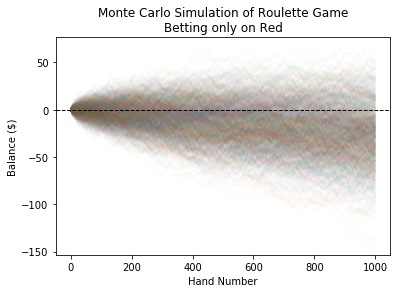

In [3]:
# Can a gambler win by just betting on red in the long term?
N = 1000                        # Rule 1: 1000 hands / day
bet_size = 1                    # Rule 2: We only bet $1 every time
bet_type = b'R'                 #         We only bet on red
n_games = 1000                  # Rule 3: We will play exactly 1000 games/sessions


ending_balances = []            # ending balance after each session/game

for _ in range(n_games):
    game = RouletteGame(N)              # simulate playing N (1000) hands
    red_black = game.is_red_black()     # red/black result
    even_odd = game.is_even_odd()       # even/odd result: not used in this strategy

    balance = [0]

    for i in range(len(game.spin_numbers)):            
        if bet_type == red_black[i]:                    
            balance.append(balance[-1] + bet_size)     # increment the balance if we made money
        else:
            balance.append(balance[-1] - bet_size)     # decrement the balance if we lost money

    plt.plot(balance, alpha=0.02)                      # plot out what happens to our bankroll balance
            
    ending_balances.append(balance[-1])
    
plt.title('Monte Carlo Simulation of Roulette Game\nBetting only on Red')
plt.ylabel('Balance ($)')
plt.xlabel('Hand Number')
plt.axhline(0.0, linestyle='--', linewidth=1, color='black');  # draw a horizontal line across 0.0, so we can visually see
                                                               # how often we will end up with positive balances

### 2.2) So will Mr. Monte Carlo be a millionaire soon?

The verdict is... Nooooooo...

Why?

From the line charts we plotted, you can see that most of the time, Mr. Monte Carlo ended up with negative balances. Not only that, when he lost money, **he lost MORE money than what amount when he won.** 😥😥😥

**FACT: Nobody can be rich by losing MORE money MOST of the time!**

### 2.3) Let's visualize the data better

Folks who are familiar with algorithmic trading would be familiar with the, uh, for lack of a better name, "spaghetti style semi transparent" chart above.

But most folks will be more familiar with histograms and single line charts.

So, we will:

1. plot the histogram of the ending balances - this will tell us what a typical day at the casino will be.
2. plot the cumulative ending balances of each session - this will tell us how much we lost after 1,000,000 hands.

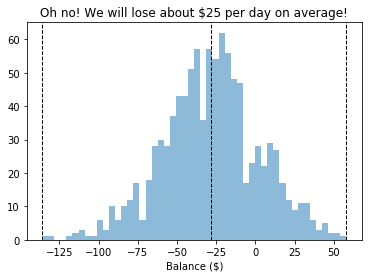

In [4]:
mean_ending_balances = np.mean(ending_balances)
worst_ending_balance = np.min(ending_balances)
best_ending_balance = np.max(ending_balances)

plt.hist(ending_balances, bins=50, alpha=0.5)
plt.axvline(mean_ending_balances, linestyle='--', color='black', linewidth=1)
plt.axvline(worst_ending_balance, linestyle='--', color='black', linewidth=1)
plt.axvline(best_ending_balance, linestyle='--', color='black', linewidth=1)
plt.title('Oh no! We will lose about $25 per day on average!')
plt.xlabel('Balance ($)');

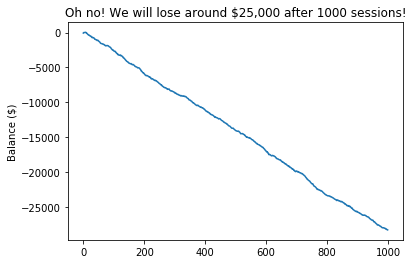

In [5]:
plt.plot(np.cumsum(ending_balances))
plt.title('Oh no! We will lose around $25,000 after 1000 sessions!')
plt.ylabel('Balance ($)');

### 2.4) "...But betting on red is a stupid idea!"

**You are right**. Couldn't agree more.

But **any other betting pattern is not any smarter** than betting only on red. Whether you bet on black, red, even or odd, the house edge is always there to eat away your money.

### 2.5) Your turn

**Mr. Monte Carlo is now super grumpy after losing money, so he is throwing you a challenge:** 

1. Use my code above as a template, implement your own betting rules (e.g. how do you decide what to bet on?)
2. Implement bankroll management - try any Martingale technique variations available on the internet
3. Have fun. Then tell me what you implemented!